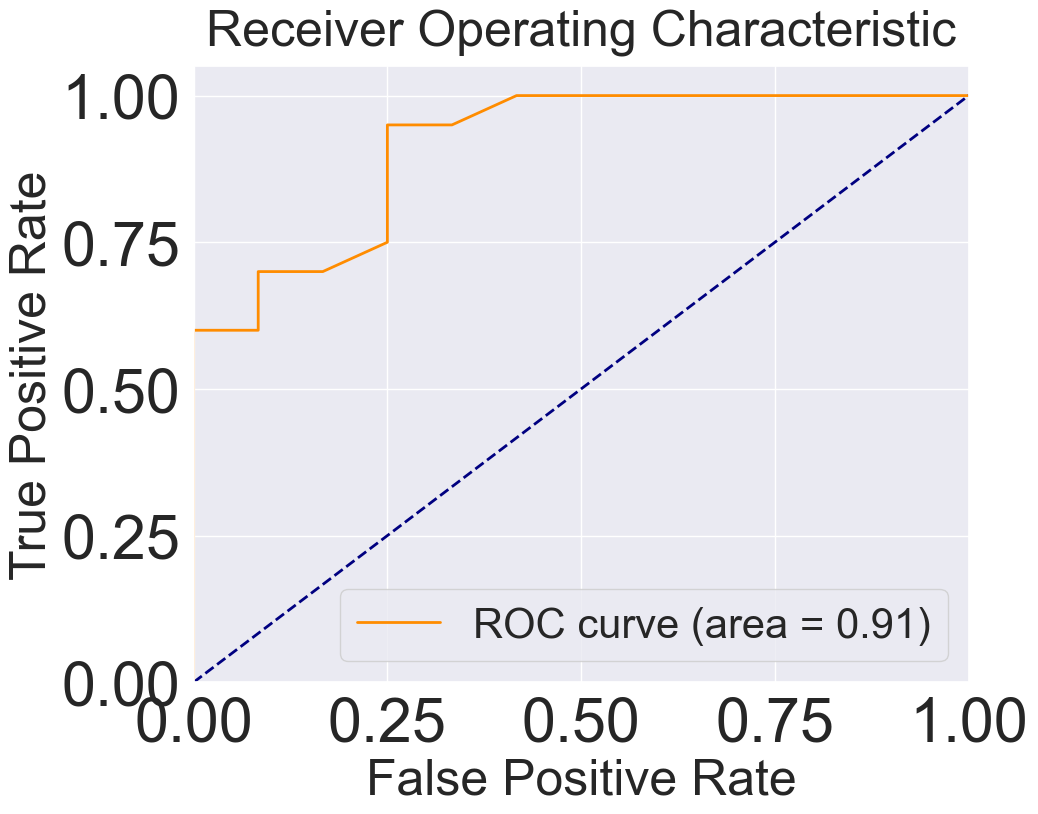

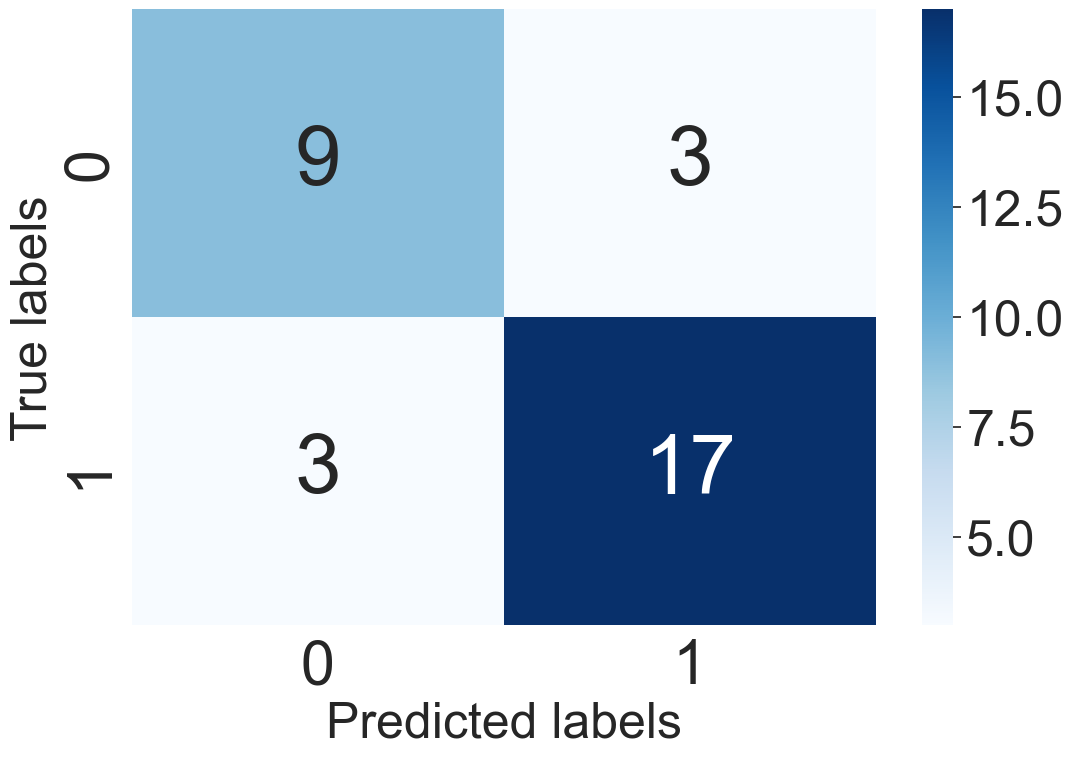

AUC Score: 0.9125000000000001
Sensitivity: 0.85
Accuracy: 0.8125
Confusion Matrix:
[[ 9  3]
 [ 3 17]]
Specificity: 0.75
Precision: 0.85


In [2]:
#随机森林
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# 1. 读取训练集和测试集CSV文件
train_data = pd.read_csv('D:/radiomic1/glioma/csv4/lasso_selected_features_train_t2_s1.csv')
test_data = pd.read_csv('D:/radiomic1/glioma/csv4/lasso_selected_features_test_t2_s1.csv')
# 2. 分离特征和标签
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

# 3. 初始化并训练随机森林模型
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]
# 计算AUC
auc_score = roc_auc_score(y_test, y_pred_proba)
# 4. 使用测试集评估模型

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# auc_score = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)

# 5. 绘制ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=36)
plt.ylabel('True Positive Rate', fontsize=36)
plt.title('Receiver Operating Characteristic', fontsize=36, y=1.02)
plt.legend(loc="lower right", prop={'size': 30})
plt.show()

print("\n")
# 6. 绘制混淆矩阵
plt.figure(figsize=(12, 8))
sns.set(font_scale=4)
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 60})#中间
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=36)
plt.xlabel('Predicted labels', fontsize=36)
plt.ylabel('True labels', fontsize=36)
# plt.title('LASSO feature-Random forest', fontsize=36, y=1.02)  # 调整标题位置
plt.show()
# 计算 specificity
specificity = tn / (tn + fp)

# 计算 precision
precision = tp / (tp + fp)


# 7. 输出评估指标
print("AUC Score:", auc_score)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Specificity:", specificity)
print("Precision:", precision)


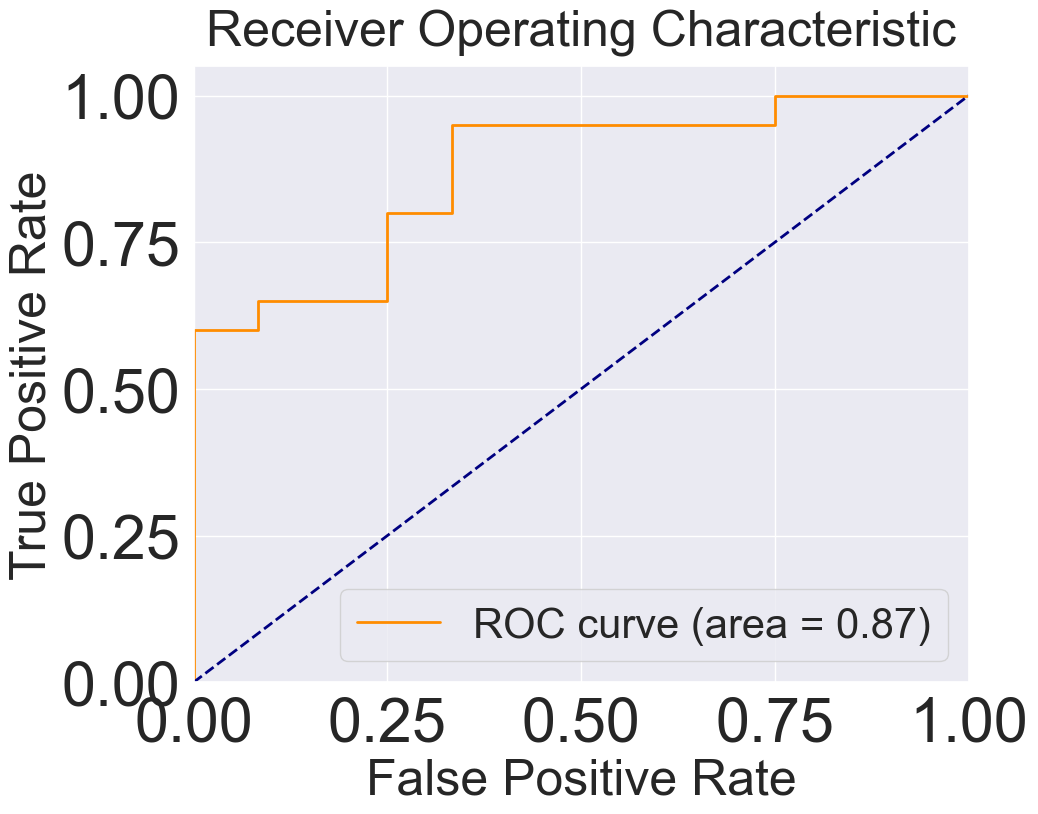

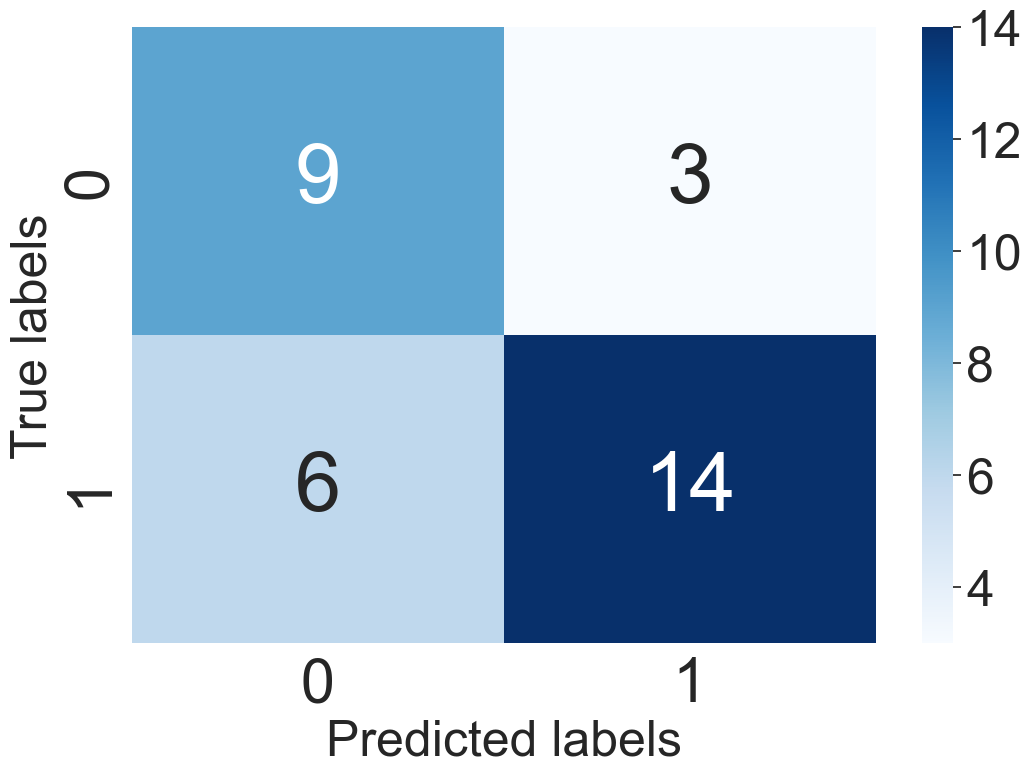

AUC Score: 0.8708333333333333
Sensitivity: 0.7
Accuracy: 0.71875
Confusion Matrix:
[[ 9  3]
 [ 6 14]]
Specificity: 0.75
Precision: 0.8235294117647058


In [3]:
#xgboost
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve
# 1. 读取训练集和测试集CSV文件
train_data = pd.read_csv('D:/radiomic1/glioma/csv4/lasso_selected_features_train_t2_s1.csv')
test_data = pd.read_csv('D:/radiomic1/glioma/csv4/lasso_selected_features_test_t2_s1.csv')
# 2. 分离特征和标签
x_train = train_data.drop('label', axis=1)
y_train = train_data['label']
x_test = test_data.drop('label', axis=1)
y_test = test_data['label']
clf_XGB = XGBClassifier(use_label_encoder=False)
clf_XGB.fit(x_train, y_train)
# 计算预测概率
y_pred_proba = clf_XGB.predict_proba(x_test)[:, 1]

# 计算AUC
auc_score = roc_auc_score(y_test, y_pred_proba)

# 计算模型评估指标
y_pred = clf_XGB.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
# auc_score = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)

# 5. 绘制ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=36)
plt.ylabel('True Positive Rate', fontsize=36)
plt.title('Receiver Operating Characteristic', fontsize=36, y=1.02)
plt.legend(loc="lower right", prop={'size': 30})
plt.show()

print("\n")
# 6. 绘制混淆矩阵
plt.figure(figsize=(12, 8))
sns.set(font_scale=4)
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 60})#中间
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=36)
plt.xlabel('Predicted labels', fontsize=36)
plt.ylabel('True labels', fontsize=36)
# plt.title('LASSO feature-Xgboost', fontsize=36, y=1.02)  # 调整标题位置
plt.show()
# 计算 specificity
specificity = tn / (tn + fp)

# 计算 precision
precision = tp / (tp + fp)
# 输出模型评估指标
print("AUC Score:", auc_score)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)
# print("AUC Score:", auc_score)
print("Confusion Matrix:")
print(conf_matrix)
print("Specificity:", specificity)
print("Precision:", precision)

# # 做学习曲线
# scoreTrainList, scoreTestList = [], [] # 把训练集和测试集的得分（准确率）存在数组里
# maxTreeNum = 100
# for i in range(1, maxTreeNum):
#     clf_XGB = XGBClassifier(random_state=21, n_estimators=i,
#     objective="binary:hinge", use_label_encoder=False)
#     clf_XGB.fit(x_train, y_train)
#     score_test = clf_XGB.score(x_test, y_test)
#     core_train = clf_XGB.score(x_train, y_train)
#     scoreTestList.append(score_test)
#     scoreTrainList.append(score_train)
# plt.plot(range(1, maxTreeNum), scoreTestList, label="Test")
# plt.plot(range(1, maxTreeNum), scoreTrainList, label="Train")
# plt.legend()
# plt.xlabel('Number of Trees')
# plt.ylabel('Accuracy')
# plt.title('Learning Curve')
# plt.show()



# print("The maximum accuracy of the test set and its corresponding number of trees:",
#  max(scoreTestList), scoreTestList.index(max(scoreTestList))+1)



C:\Users\xiao\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


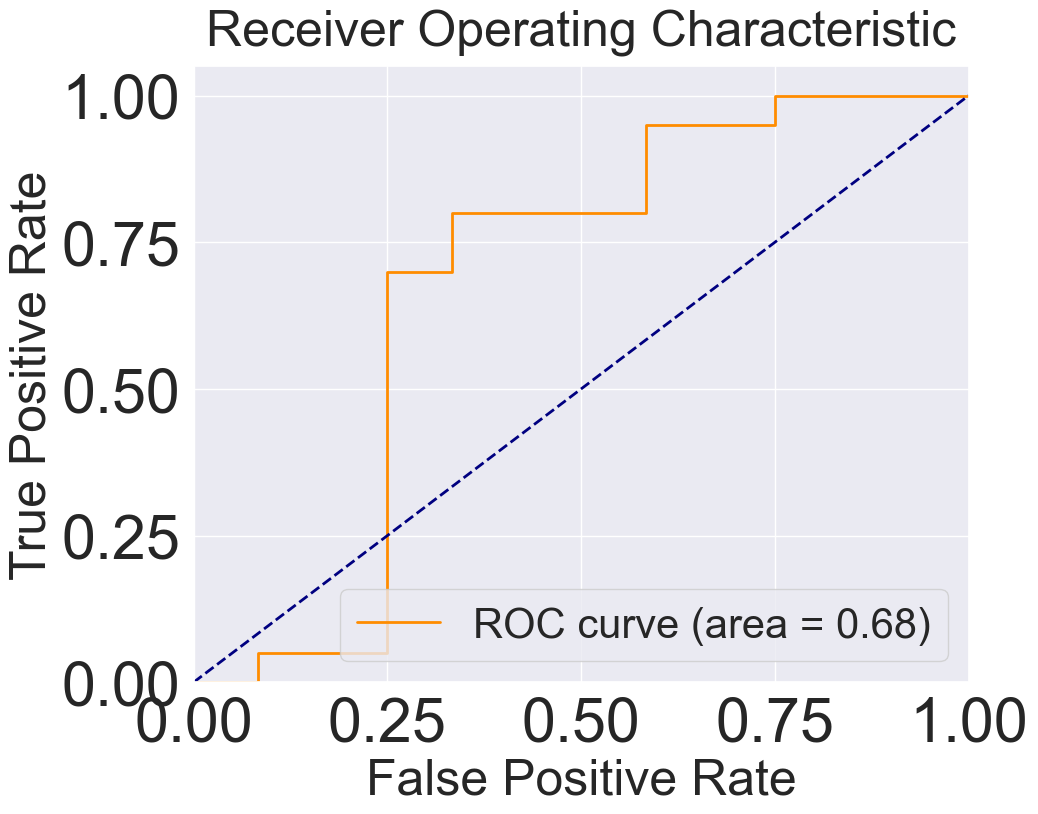

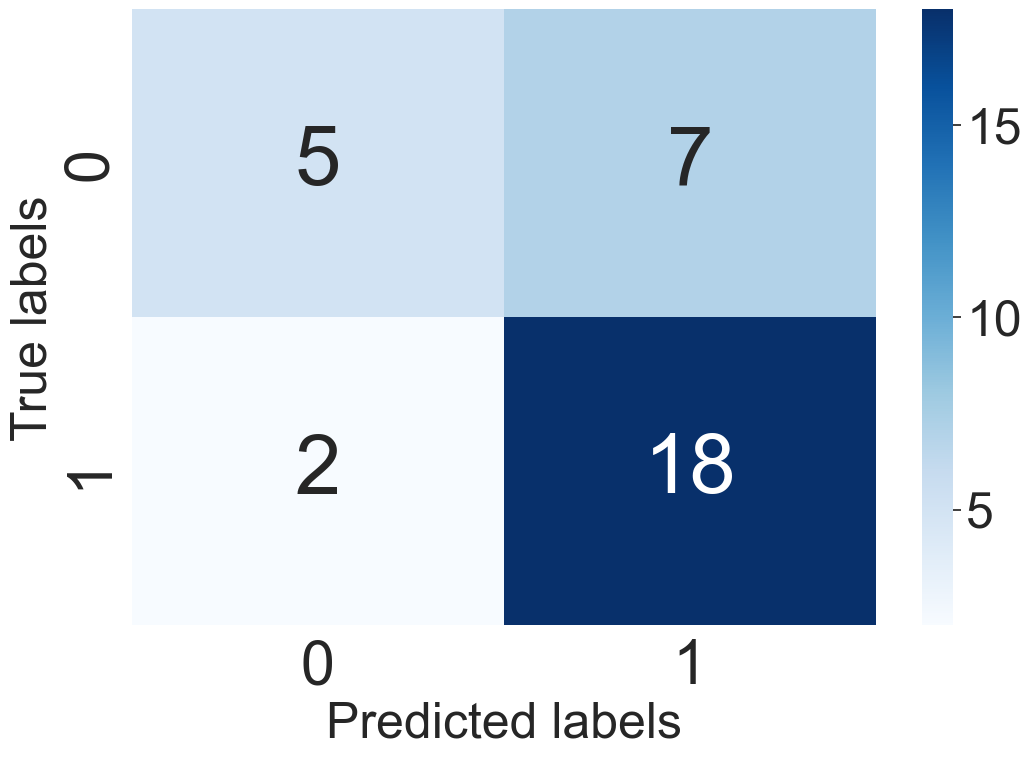

AUC Score: 0.675
Sensitivity: 0.9
Accuracy: 0.71875
Confusion Matrix:
[[ 5  7]
 [ 2 18]]
Specificity: 0.4166666666666667
Precision: 0.72


In [4]:
#LR
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# 1. 读取训练集和测试集CSV文件
train_data = pd.read_csv('D:/radiomic1/glioma/csv4/lasso_selected_features_train_t2_s1.csv')
test_data = pd.read_csv('D:/radiomic1/glioma/csv4/lasso_selected_features_test_t2_s1.csv')
# 2. 分离特征和标签
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

# 3. 初始化并训练逻辑回归模型
model = LogisticRegression(penalty="l2",solver="liblinear",C=1.0,max_iter=100)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]
# 计算AUC
auc_score = roc_auc_score(y_test, y_pred_proba)
# 4. 使用测试集评估模型
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# auc_score = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)

# 5. 绘制ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=36)
plt.ylabel('True Positive Rate', fontsize=36)
plt.title('Receiver Operating Characteristic', fontsize=36, y=1.02)
plt.legend(loc="lower right", prop={'size': 30})
plt.show()

print("\n")
# 6. 绘制混淆矩阵
plt.figure(figsize=(12, 8))
sns.set(font_scale=4)
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 60})#中间
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=36)
plt.xlabel('Predicted labels', fontsize=36)
plt.ylabel('True labels', fontsize=36)
# plt.title('LASSO feature-Logistic regression', fontsize=36, y=1.02)  # 调整标题位置
plt.show()

# 计算 specificity
specificity = tn / (tn + fp)

# 计算 precision
precision = tp / (tp + fp)
# 7. 输出评估指标
print("AUC Score:", auc_score)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

print("Specificity:", specificity)
print("Precision:", precision)



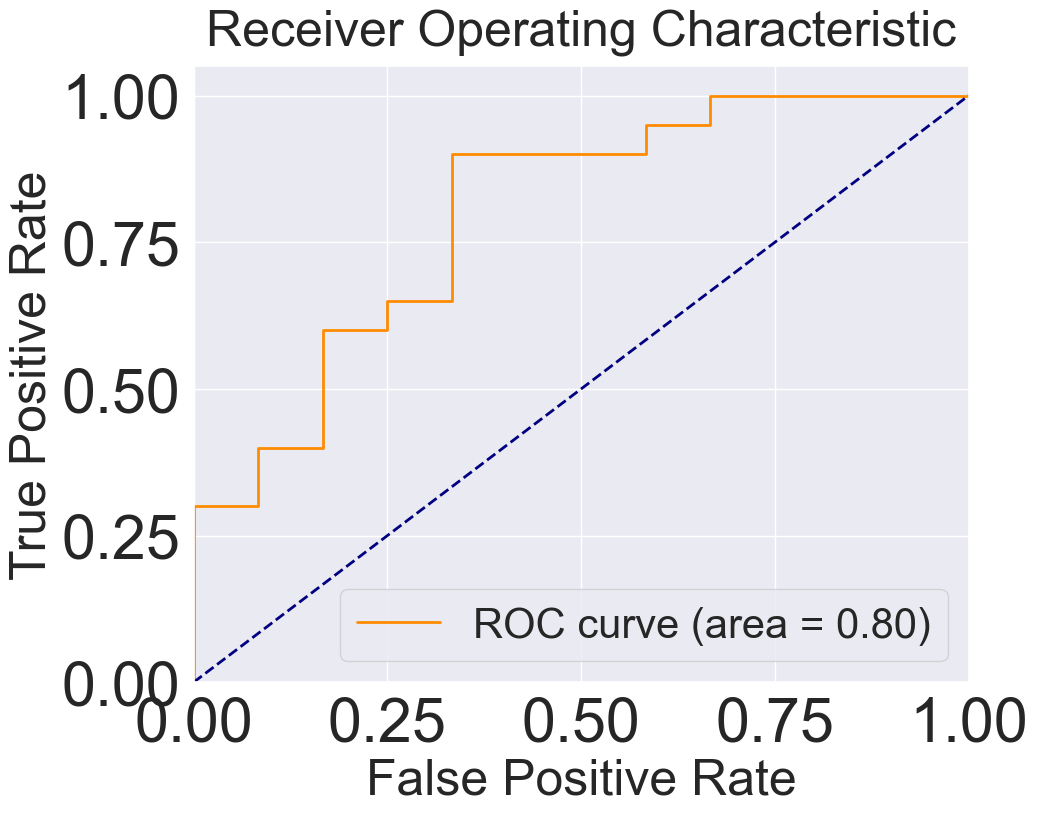

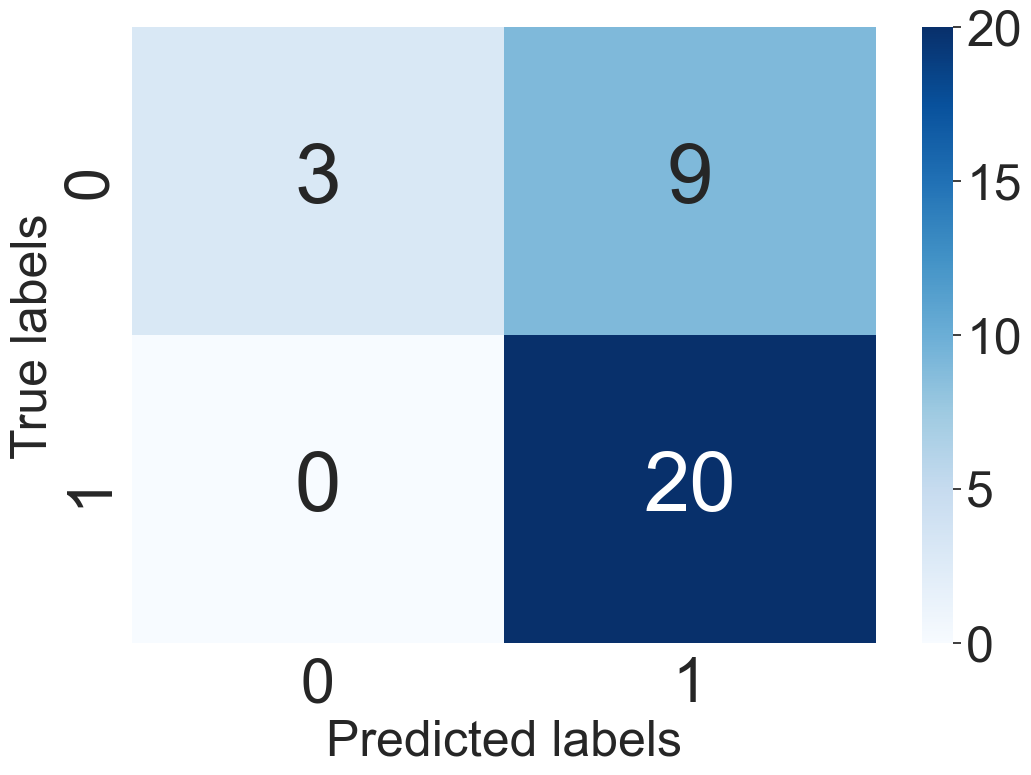

AUC Score: 0.8
Sensitivity: 1.0
Accuracy: 0.71875
Confusion Matrix:
[[ 3  9]
 [ 0 20]]
Specificity: 0.25
Precision: 0.6896551724137931


In [5]:
#svm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# 1. 读取训练集和测试集CSV文件
train_data = pd.read_csv('D:/radiomic1/glioma/csv4/lasso_selected_features_train_t2_s1.csv')
test_data = pd.read_csv('D:/radiomic1/glioma/csv4/lasso_selected_features_test_t2_s1.csv')
# 2. 分离特征和标签
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']
# 3. 初始化并训练支持向量机模型
# model = SVC(probability=True)
model = SVC(kernel='rbf', C=1.0,probability=True)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 计算AUC
auc_score = roc_auc_score(y_test, y_pred_proba)
# 4. 使用测试集评估模型
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# auc_score = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)

# 5. 绘制ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=36)
plt.ylabel('True Positive Rate', fontsize=36)
plt.title('Receiver Operating Characteristic', fontsize=36, y=1.02)
plt.legend(loc="lower right", prop={'size': 30})
plt.show()

print("\n")
# 6. 绘制混淆矩阵
plt.figure(figsize=(12, 8))
sns.set(font_scale=4)
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 60})#中间
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=36)
plt.xlabel('Predicted labels', fontsize=36)
plt.ylabel('True labels', fontsize=36)
# plt.title('LASSO feature-Support vector machine', fontsize=36, y=1.02)  # 调整标题位置
plt.show()

# 计算 specificity
specificity = tn / (tn + fp)

# 计算 precision
precision = tp / (tp + fp)
# 7. 输出评估指标
print("AUC Score:", auc_score)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


print("Specificity:", specificity)
print("Precision:", precision)



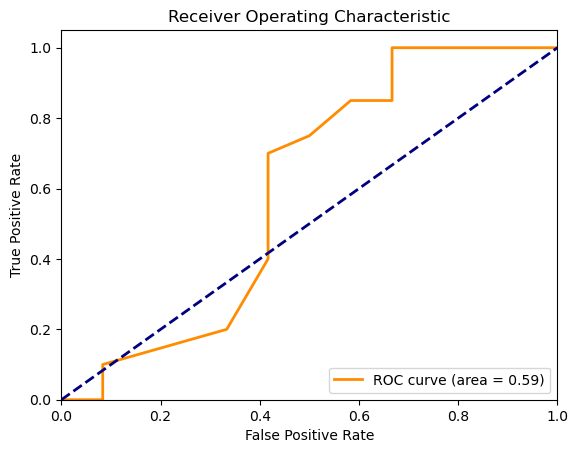

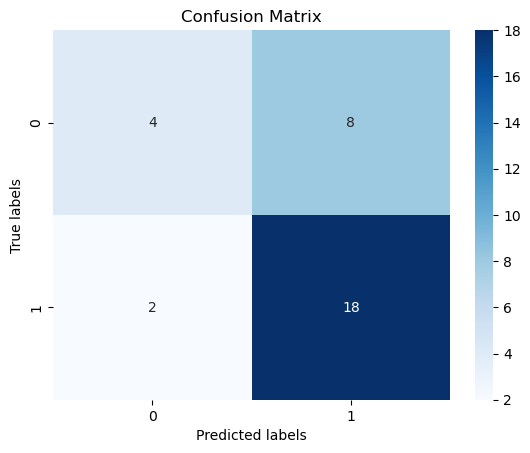

AUC Score: 0.59375
Sensitivity: 0.9
Accuracy: 0.6875
Confusion Matrix:
[[ 4  8]
 [ 2 18]]
Specificity: 0.3333333333333333
Precision: 0.6923076923076923


In [3]:
#mlp
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 读取训练集和测试集CSV文件
train_data = pd.read_csv('D:/radiomic1/glioma/csv4/lasso_selected_features_train_t2_s1.csv')
test_data = pd.read_csv('D:/radiomic1/glioma/csv4/lasso_selected_features_test_t2_s1.csv')

# 2. 分离特征和标签
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

# 3. 初始化并训练MLP模型
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='tanh',max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# 4. 使用测试集评估模型
y_pred_proba = mlp_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)

y_pred = mlp_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)

# 5. 绘制ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 6. 绘制混淆矩阵
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# 计算 specificity
specificity = tn / (tn + fp)

# 计算 precision
precision = tp / (tp + fp)

# 7. 输出评估指标
print("AUC Score:", auc_score)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Specificity:", specificity)
print("Precision:", precision)
